<a href="https://colab.research.google.com/github/Jignacio14/7506R-1C2023-GRUPO09/blob/Pruebas/7506R_TP1_GRUPO9_CHP1_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pruebas

En este jupyter notebook vamos a explorar un conjunto de datos sobre reservas de hoteles y tratar de hallar un modelo que nos permita predecir si la reserva va a ser cancelada 

Importamos todas las librerias que vamos a usar

In [3]:
import pandas as pd 
import numpy as np
import sklearn as sk
import seaborn as sns
from matplotlib import pyplot as plt

Cargamos los datos en un dataframe de pandas. Creamos una copia del dataframe original y trabajamos encima de la copia

In [4]:
hotelsDfOriginal = pd.read_csv("./hotels_train.csv")
hotelsdf = hotelsDfOriginal.copy()

print("El data frame esta compuesto por "f"{hotelsdf.shape[0]}"" filas y "f"{hotelsdf.shape[1]}"" columnas")

El data frame esta compuesto por 41096 filas y 33 columnas


Un vistaso básico a la información contenida en el dataframe:

In [5]:
pd.concat([hotelsdf.head(2), hotelsdf.sample(5), hotelsdf.tail(2)])

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,NaN,0,Transient,115.5,0.0,1.0,Canceled,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1.0
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,0,Transient,42.0,1.0,0.0,Check-Out,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0.0
18148,City Hotel,9,2016,April,18,28,1,3,2,0.0,...,NaN,0,Transient,133.5,0.0,1.0,Check-Out,2016-05-02,0dbe2ba0-b95b-4b25-8728-ea7d61922902,0.0
26442,City Hotel,70,2017,July,31,31,1,2,3,0.0,...,NaN,0,Transient,230.0,0.0,1.0,Canceled,2017-05-23,c43116c2-35a2-4ad5-b032-63dbc60ce928,1.0
11926,Resort Hotel,29,2017,August,35,29,0,3,2,0.0,...,NaN,0,Transient,194.0,0.0,0.0,Canceled,2017-08-21,1aad7607-874c-4055-bcd9-615d1084a043,1.0
34213,City Hotel,75,2016,April,15,7,0,3,3,0.0,...,NaN,0,Transient,128.7,1.0,2.0,Check-Out,2016-04-10,da629fc8-9dcf-4c9c-9a43-11cbc57ab174,0.0
21365,City Hotel,292,2016,July,30,21,0,2,2,0.0,...,NaN,0,Transient-Party,115.0,0.0,0.0,Check-Out,2016-07-23,80045ad5-9e9e-4221-b2eb-0c147ec57092,0.0
41094,City Hotel,12,2017,February,8,20,1,1,1,0.0,...,NaN,0,Transient,80.0,0.0,0.0,Canceled,2017-02-16,885baad6-43dd-4866-b3df-cf6ab63252eb,1.0
41095,City Hotel,50,2015,October,43,24,1,1,2,0.0,...,NaN,0,Tr,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Renombramos las columnas del dataframe con nombres mas claros y en español

In [39]:
nuevas_columnas = {'hotel':'hotel_name', #
    'lead_time':'lead_time',
    'arrival_date_year':'arrival_year',#
    'arrival_date_month':'arrival_month',#
    'arrival_date_week_number':'arrival_week_number',
    'arrival_date_day_of_month':'arrival_month_day',#
    'stays_in_weekend_nights':'weekend_nights_num',#
    'stays_in_week_nights':'week_nights_num', # 
    'adults':'adult_num',#
    'children':'children_num', #En el paper, dice que children es un int. Pero figura como float64. #TODO: Investigar
    'babies':'babies_num',
    'company':'ID_compania',
    'days_in_waiting_list': 'cantidad_dias_listaEspera',
    'customer_type': 'tipo_cliente',
    'adr': 'promedio_gastos_diarios', #No me termina de cerrar este valor
    'required_car_parking_spaces': 'cantidad_estacionamientos_pedidos',
    'total_of_special_requests': 'cantidad_pedidos_especiales',
    'reservation_status': 'estado_reserva',
    'reservation_status_date': 'estado_reserva_fecha',
    'id': 'id',
    'is_canceled': 'esta_cancelado',}

nuevas_columnas = {
    'adr': '',
    'adults':'adult_num',
    'agent': '',
    'arrival_date_day_of_month':'arrival_month_day',
    'arrival_date_month':'arrival_month',
    'arrival_date_week_number':'arrival_week_number',

}

print(len(nuevas_columnas))
#hotelsdf.rename(columns = nuevas_columnas, inplace = True)

21


In [7]:
#pd.concat([hotelsdf.head(2), hotelsdf.sample(5), hotelsdf.tail(2)])

Por otro lado, podemos observar que tipo de dato almacena cada columna y cuales tienen datos faltantes

In [8]:
hotelsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41096 entries, 0 to 41095
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           41096 non-null  object 
 1   lead_time                       41096 non-null  int64  
 2   arrival_date_year               41096 non-null  int64  
 3   arrival_date_month              41096 non-null  object 
 4   arrival_date_week_number        41096 non-null  int64  
 5   arrival_date_day_of_month       41096 non-null  int64  
 6   stays_in_weekend_nights         41096 non-null  int64  
 7   stays_in_week_nights            41096 non-null  int64  
 8   adults                          41096 non-null  int64  
 9   children                        41094 non-null  float64
 10  babies                          41096 non-null  int64  
 11  meal                            41096 non-null  object 
 12  country                         

Segun la clasificacion de las variables podemos establecer lo siguiente sobre los datos extraidos del dataframe

Variables cuantitativas, entre las cuales podemos encontrar:

- lead_time "time beetwen reservation and arrival"
- arrival_date_year
- arrival_date_week_number  
- arrival_date_day_of_month
- stays_in_weekend_nights
- days_in_waiting_list
- stays_in_week_nights
- adult
- children
- babies
- previous_cancellations
- previous_bookings_not_canceled
- booking_changes
- days_in_waiting_list
- adr "average day rate"
- required_car_parking_spaces
- total_of_special_requests
- reservation_status_date


Creamos una lista con todas las variables cuantitativas

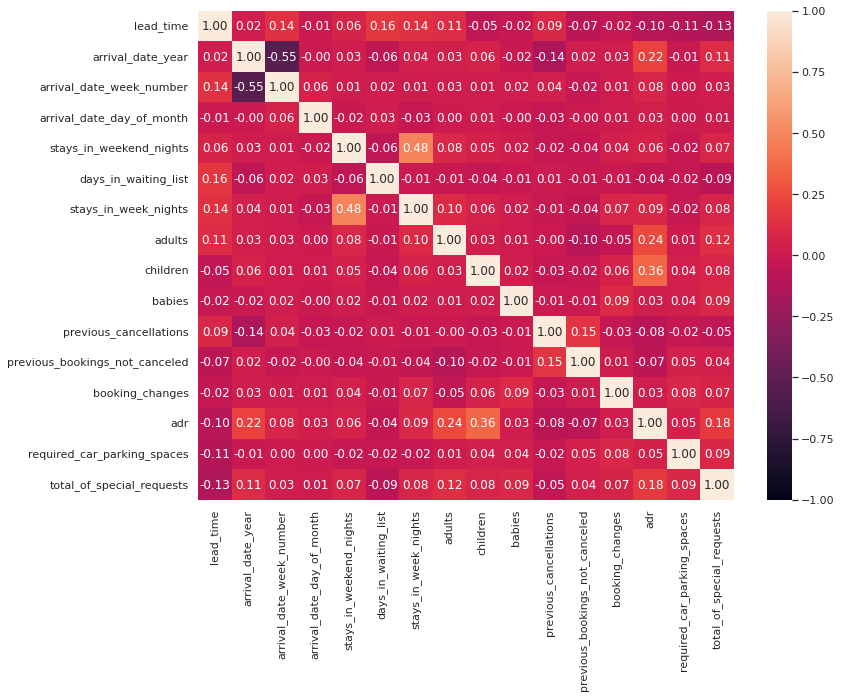

In [31]:
cuantitativas = ["lead_time"
,"arrival_date_year"
,"arrival_date_week_number"
,"arrival_date_day_of_month"
,"stays_in_weekend_nights"
,"days_in_waiting_list"
,"stays_in_week_nights"
,"adults"
,"children"
,"babies"
,"previous_cancellations"
,"previous_bookings_not_canceled"
,"booking_changes"
,"adr"
,"required_car_parking_spaces"
,"total_of_special_requests"
,"reservation_status_date"]

correlaciones = hotelsdf[cuantitativas].corr()

sns.set(style = 'darkgrid')
plt.figure( figsize = (12, 9))
sns.heatmap(data = correlaciones,annot = True, vmin = -1, vmax =1, fmt='.2f')
sns.color_palette("mako", as_cmap=True)
plt.show()

In [35]:
hotelsdf[cuantitativas].describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,days_in_waiting_list,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
count,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41094.000000,41096.000000,41096.000000,41096.000000,41096.000000,41095.000000,41095.000000,41095.000000
mean,112.185614,2016.154395,27.194447,15.779979,0.920211,2.543995,2.498005,1.862736,0.103275,0.007008,0.117043,0.122177,0.196929,102.361708,0.049276,0.521767
std,110.965514,0.711085,13.522517,8.790629,0.988797,17.901044,1.870603,0.554658,0.398501,0.094112,0.989826,1.521181,0.606836,47.680706,0.220788,0.774249
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,23.000000,2016.000000,16.000000,8.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,77.000000,2016.000000,28.000000,16.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,172.000000,2017.000000,38.000000,23.000000,2.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,629.000000,2017.000000,53.000000,31.000000,16.000000,391.000000,40.000000,40.000000,3.000000,9.000000,26.000000,70.000000,15.000000,426.250000,8.000000,5.000000


In [ ]:
hotelsdf.isnull().sum()

Variables cualitativas

In [34]:
cualitativas = ['hotel',"arrival_date_month", 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']

#no tiene sentido imprimir cosas como id, company, deposite_type

for variable in cualitativas:
  print(hotelsdf[variable].value_counts().index.tolist())



['City Hotel', 'Resort Hotel']
['August', 'July', 'May', 'April', 'October', 'June', 'September', 'March', 'February', 'December', 'November', 'January']
['BB', 'HB', 'SC', 'Undefined', 'FB']
['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'USA', 'NLD', 'CHE', 'CN', 'AUT', 'CHN', 'SWE', 'POL', 'RUS', 'NOR', 'ISR', 'ROU', 'AUS', 'DNK', 'AGO', 'FIN', 'TUR', 'MAR', 'LUX', 'HUN', 'ARG', 'KOR', 'JPN', 'IND', 'CZE', 'GRC', 'COL', 'ZAF', 'MEX', 'HRV', 'DZA', 'LTU', 'IRN', 'EST', 'THA', 'BGR', 'SVK', 'UKR', 'SAU', 'NZL', 'CHL', 'ARE', 'SRB', 'MOZ', 'SVN', 'TWN', 'PHL', 'NGA', 'HKG', 'EGY', 'IDN', 'CYP', 'LVA', 'ISL', 'BLR', 'SGP', 'GEO', 'AZE', 'MYS', 'LBN', 'JOR', 'TUN', 'GIB', 'PER', 'VEN', 'URY', 'PRI', 'CRI', 'ECU', 'QAT', 'CPV', 'KWT', 'MAC', 'KAZ', 'PAK', 'SEN', 'DOM', 'ALB', 'MLT', 'JEY', 'MDV', 'FRO', 'BIH', 'MKD', 'BOL', 'GNB', 'AND', 'MNE', 'OMN', 'ARM', 'IRQ', 'MUS', 'CIV', 'VNM', 'ETH', 'GAB', 'PRY', 'SYC', 'LBY', 'TZA', 'BEN', 'MYT', 'COM', 'SUR', 'BGD', 'GGY', 'TJ

In [33]:
print(pd.__version__)

1.4.4
